In [61]:
!pip install numpy pandas matplotlib seaborn plotly imbalanced-learn nbformat ipython xgboost mlflow boto3


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
import mlflow.xgboost
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlflow.tracking import MlflowClient


In [63]:
mlflow.set_tracking_uri("https://66e509f05a9319f04690f279.bm-east.lab.poridhi.io/proxy/5000/")  # Replace with your MLflow server URI

mlflow.set_experiment("House Price Prediction lab 10")


<Experiment: artifact_location='s3://salesprice001/mlflow-artifacts/1', creation_time=1738432714776, experiment_id='1', last_update_time=1738432714776, lifecycle_stage='active', name='House Price Prediction lab 10', tags={}>

In [64]:
train_data = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [66]:
train_data.isnull().sum()
train_data.shape


(1460, 81)

In [67]:
train_data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id', 'GarageYrBlt'], axis=1, inplace = True)


In [68]:
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mode()[0])
train_data['BsmtCond']=train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])
train_data['BsmtQual']=train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])
train_data['FireplaceQu']=train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0])
train_data['GarageType']=train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])
train_data['GarageFinish']=train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0])
train_data['GarageQual']=train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0])
train_data['GarageCond']=train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])


In [69]:
train_data.isnull().sum().sum()


994

<Axes: >

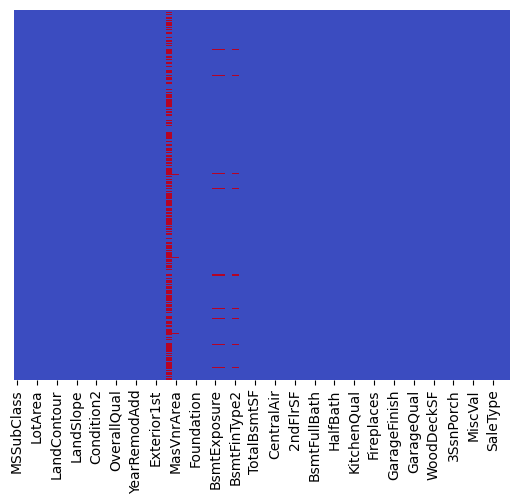

In [70]:
import seaborn as sns
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')


In [71]:
train_data['MasVnrType']=train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mode()[0])
train_data['BsmtExposure']=train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0])
train_data['BsmtFinType2']=train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0])


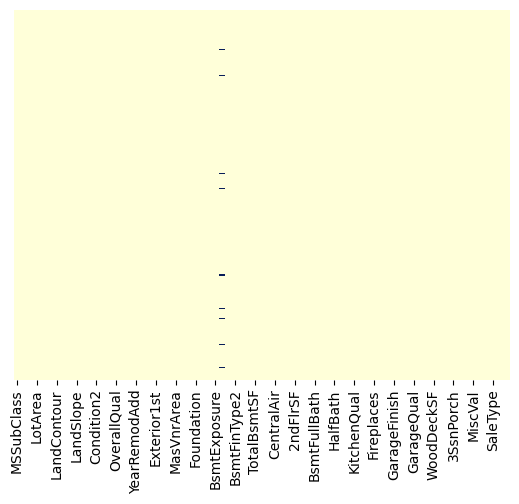

In [72]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')
train_data.dropna(inplace=True)


In [73]:
test_data = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')
test_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [74]:
test_data.isnull().sum()
test_data.shape


(1459, 80)

In [75]:
test_data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id', 'GarageYrBlt'], axis=1, inplace = True)


In [76]:
test_data['LotFrontage']=test_data['LotFrontage'].fillna(test_data['LotFrontage'].mode()[0])
test_data['BsmtCond']=test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['BsmtQual']=test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
test_data['FireplaceQu']=test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode()[0])
test_data['GarageType']=test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['GarageFinish']=test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
test_data['GarageQual']=test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
test_data['GarageCond']=test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])
test_data['MasVnrType']=test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mode()[0])
test_data['BsmtExposure']=test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['BsmtFinType2']=test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])


In [77]:
test_data.loc[:, test_data.isnull().any()].head()


,MSZoning,Utilities,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCars,GarageArea,SaleType
0,RH,AllPub,VinylSd,VinylSd,Rec,468.0,144.0,270.0,882.0,0.0,0.0,TA,Typ,1.0,730.0,WD
1,RL,AllPub,Wd Sdng,Wd Sdng,ALQ,923.0,0.0,406.0,1329.0,0.0,0.0,Gd,Typ,1.0,312.0,WD
2,RL,AllPub,VinylSd,VinylSd,GLQ,791.0,0.0,137.0,928.0,0.0,0.0,TA,Typ,2.0,482.0,WD
3,RL,AllPub,VinylSd,VinylSd,GLQ,602.0,0.0,324.0,926.0,0.0,0.0,Gd,Typ,2.0,470.0,WD
4,RL,AllPub,HdBoard,HdBoard,ALQ,263.0,0.0,1017.0,1280.0,0.0,0.0,Gd,Typ,2.0,506.0,WD


In [78]:
test_data['Utilities']=test_data['Utilities'].fillna(test_data['Utilities'].mode()[0])
test_data['Exterior1st']=test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['Exterior2nd']=test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['BsmtFinType1']=test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])
test_data['BsmtFinSF1']=test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())
test_data['BsmtFinSF2']=test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mean())
test_data['BsmtUnfSF']=test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mean())
test_data['TotalBsmtSF']=test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mode()[0])
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mode()[0])
test_data['KitchenQual']=test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['Functional']=test_data['Functional'].fillna(test_data['Functional'].mode()[0])
test_data['GarageCars']=test_data['GarageCars'].fillna(test_data['GarageCars'].mean())
test_data['GarageArea']=test_data['GarageArea'].fillna(test_data['GarageArea'].mean())
test_data['SaleType']=test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])


In [79]:
test_data.shape


(1459, 74)

In [80]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']


In [81]:
def category_onehot_multcols(multcolumns):
    data_final=final_data
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_data[fields],drop_first=True)
        
        final_data.drop([fields],axis=1,inplace=True)
        if i==0:
            data_final=df1.copy()
        else:
            
            data_final=pd.concat([data_final,df1],axis=1)
        i=i+1
       
        
    data_final=pd.concat([final_data,data_final],axis=1)
        
    return data_final


In [82]:
train_data2 = train_data.copy()


In [83]:
final_data=pd.concat([train_data,test_data],axis=0)


In [84]:
final_data['SalePrice']
final_data.shape


(2881, 75)

In [85]:
final_data=category_onehot_multcols(columns)
final_data = final_data.loc[:,~final_data.columns.duplicated()]
final_data.isnull().sum().sum()




MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


1459

In [86]:
boolean_columns = ['Min1', 'Min2', 'Typ', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'RFn', 'P']
for col in boolean_columns:
    final_data[col] = final_data[col].astype(int)
    final_data[col] = final_data[col].astype(int)

final_data.dtypes


MSSubClass       int64
LotFrontage    float64
LotArea          int64
OverallQual      int64
OverallCond      int64
                ...   
BuiltIn          int64
CarPort          int64
Detchd           int64
RFn              int64
P                int64
Length: 174, dtype: object

In [87]:
numeric_columns = final_data.select_dtypes(include=['int64', 'float64']).columns
final_data[numeric_columns] = final_data[numeric_columns].astype(float)

final_data.dtypes


MSSubClass     float64
LotFrontage    float64
LotArea        float64
OverallQual    float64
OverallCond    float64
                ...   
BuiltIn        float64
CarPort        float64
Detchd         float64
RFn            float64
P              float64
Length: 174, dtype: object

In [88]:
null_values_before = final_data.isnull().sum().sum()
null_columns = final_data.columns[final_data.isnull().any()].tolist()
print("Columns with null values:")
for col in null_columns:
    print(f"{col}: {final_data[col].isnull().sum()} nulls")


Columns with null values:
SalePrice: 1459 nulls


In [89]:
for col in null_columns:
    if final_data[col].dtype == 'object':
        # For categorical columns, fill with mode
        final_data[col] = final_data[col].fillna(final_data[col].mode()[0])
    else:
        # For numerical columns, fill with mean
        final_data[col] = final_data[col].fillna(final_data[col].mean())

# Verify all nulls are handled
print("Remaining null values:", final_data.isnull().sum().sum())


Remaining null values: 0


In [90]:
with mlflow.start_run(run_name="data_preprocessing") as run:
    # Log dataset info
    mlflow.log_param("dataset_size", len(final_data))
    mlflow.log_param("num_features", final_data.shape[1])
    
    # Log preprocessing steps
    preprocessing_steps = {
        "dropped_columns": ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id', 'GarageYrBlt'],
        "filled_null_columns": ["LotFrontage", "BsmtCond", "BsmtQual", "FireplaceQu", 
                              "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
    }
    mlflow.log_dict(preprocessing_steps, "preprocessing_steps.json")
    
    # Log data quality metrics
    data_quality_metrics = {
        "null_values_before": null_values_before,
        "null_values_after": final_data.isnull().sum().sum()
    }
    mlflow.log_metrics(data_quality_metrics)


2025/02/01 18:18:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run data_preprocessing at: https://66e509f05a9319f04690f279.bm-east.lab.poridhi.io/proxy/5000/#/experiments/1/runs/325aad46c3804b79b8d93f3851c27ea1.
2025/02/01 18:18:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://66e509f05a9319f04690f279.bm-east.lab.poridhi.io/proxy/5000/#/experiments/1.


S3UploadFailedError: Failed to upload /tmp/tmp6rwoxnr9/preprocessing_steps.json to salesprice001/mlflow-artifacts/1/325aad46c3804b79b8d93f3851c27ea1/artifacts/preprocessing_steps.json: An error occurred (NoSuchBucket) when calling the PutObject operation: The specified bucket does not exist

In [ ]:
data_train=final_data.iloc[:1422,:]
data_test=final_data.iloc[1422:,:]


In [ ]:
X_train=data_train.drop(['SalePrice'],axis=1)
y_train=data_train['SalePrice']


In [ ]:
import xgboost
regressor=xgboost.XGBRegressor()

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=2)


In [ ]:
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)
    return {"mse": mse, "mae": mae, "r2": r2, "rmse": np.sqrt(mse)}


In [ ]:
with mlflow.start_run(run_name="model_training") as run:
    # Log hyperparameter search space
    mlflow.log_dict(hyperparameter_grid, "hyperparameter_grid.json")
    
    # Perform RandomizedSearchCV
    random_cv.fit(X_train, y_train)
    
    # Log best parameters
    mlflow.log_params(random_cv.best_params_)
    
    # Log cross-validation results
    cv_results = {
        "mean_test_score": random_cv.cv_results_['mean_test_score'],
        "std_test_score": random_cv.cv_results_['std_test_score'],
        "mean_train_score": random_cv.cv_results_['mean_train_score'],
        "std_train_score": random_cv.cv_results_['std_train_score']
    }
    mlflow.log_dict(cv_results, "cv_results.json")
    
    # Log best model metrics
    best_model = random_cv.best_estimator_
    train_metrics = evaluate_model(best_model, X_train, y_train)
    mlflow.log_metrics(train_metrics)
    
    # Log feature importance plot
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
    plt.xticks(rotation=45)
    plt.title('Top 10 Feature Importance')
    plt.tight_layout()
    mlflow.log_figure(plt.gcf(), "feature_importance.png")
    
    # Log the model
    mlflow.xgboost.log_model(best_model, "model",
                            registered_model_name="house_price_prediction_model")

    # Print best score and parameters
    print(f"Best score: {random_cv.best_score_}")
    print(f"Best parameters: {random_cv.best_params_}")


In [ ]:
import pickle
best_model = random_cv.best_estimator_
filename = 'finalized_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))


In [ ]:
import os
with mlflow.start_run(run_name="model_prediction") as run:
    # Make predictions
    y_pred = best_model.predict(data_test)
    
    # Log prediction statistics
    prediction_stats = {
        "mean_predicted_price": float(np.mean(y_pred)),
        "median_predicted_price": float(np.median(y_pred)),
        "std_predicted_price": float(np.std(y_pred)),
        "min_predicted_price": float(np.min(y_pred)),
        "max_predicted_price": float(np.max(y_pred))
    }
    mlflow.log_metrics(prediction_stats)
    
    # Create and save predictions to a CSV file
    prediction_df = pd.DataFrame({
        'predicted_price': y_pred
    })
    
    # Save predictions locally
    predictions_path = "predictions.csv"
    prediction_df.to_csv(predictions_path, index=False)
    
    # Log the predictions file
    mlflow.log_artifact(predictions_path)
    
    # Create and log a histogram of predictions
    plt.figure(figsize=(10, 6))
    plt.hist(y_pred, bins=50)
    plt.title('Distribution of Predicted House Prices')
    plt.xlabel('Predicted Price')
    plt.ylabel('Frequency')
    mlflow.log_figure(plt.gcf(), "prediction_distribution.png")
    
    # Log model version and status
    client = MlflowClient()
    try:
        model_version = client.get_latest_versions("house_price_prediction_model", stages=["None"])[0]
        client.transition_model_version_stage(
            name="house_price_prediction_model",
            version=model_version.version,
            stage="Production"
        )
    except Exception as e:
        print(f"Error updating model version: {str(e)}")
    
    # Clean up
    plt.close()
    if os.path.exists(predictions_path):
        os.remove(predictions_path)


In [ ]:
def compare_runs(experiment_name="House Price Prediction", top_n=5):
    """Compare different runs and their metrics"""
    
    # Start a new MLflow run to track this comparison process
    with mlflow.start_run(run_name="model_comparison"):
        client = MlflowClient()
        experiment = client.get_experiment_by_name(experiment_name)
        
        # Search for runs based on R2 score in descending order
        runs = client.search_runs(
            experiment_ids=[experiment.experiment_id],
            order_by=["metrics.r2 DESC"]
        )
        
        # Create a DataFrame to store the top N runs' performance and parameters
        comparison_df = pd.DataFrame([
            {
                'run_id': run.info.run_id,
                'r2_score': run.data.metrics.get('r2', None),
                'rmse': run.data.metrics.get('rmse', None),
                'mae': run.data.metrics.get('mae', None),
                'parameters': run.data.params
            }
            for run in runs[:top_n]
        ])
        
        # Log comparison DataFrame as an artifact (optional)
        comparison_df_path = "run_comparison.csv"
        comparison_df.to_csv(comparison_df_path, index=False)
        mlflow.log_artifact(comparison_df_path)

        # Optionally, log the best performing run's metrics for tracking
        best_run = runs[0]
        best_run_metrics = {
            "best_r2_score": best_run.data.metrics.get('r2', None),
            "best_rmse": best_run.data.metrics.get('rmse', None),
            "best_mae": best_run.data.metrics.get('mae', None)
        }
        mlflow.log_metrics(best_run_metrics)

        # Print and return the comparison dataframe
        print("Best performing runs:")
        print(comparison_df)

    return comparison_df

# Example usage after model training
best_runs = compare_runs()


In [ ]:
def register_best_model(experiment_name="House Price Prediction"):
    """Register the best performing model to the model registry"""
    client = MlflowClient()
    experiment = client.get_experiment_by_name(experiment_name)
    best_run = client.search_runs(
        experiment_ids=[experiment.experiment_id],
        order_by=["metrics.r2 DESC"]
    )[0]
    
    # Register the model from the best run
    model_uri = f"runs:/{best_run.info.run_id}/model"
    mv = mlflow.register_model(model_uri, "house_price_prediction_model")
    
    # Transition the model to production
    client.transition_model_version_stage(
        name="house_price_prediction_model",
        version=mv.version,
        stage="Production"
    )
    
    return mv

# Add after model training
best_model_version = register_best_model()
print(f"Registered model version: {best_model_version.version}")
